## Generic Cubic Equation of State

Our Cubic Equations of State are implemented based on the generic Cubic
Equation:

$$
    P = \frac{RT}{V-b} - \frac{a_c\alpha(T_r)}{(V + \delta_1 b)(V - \delta_2 b)}
$$

Almost all cubic equations of state use the Quadratic mixing rule with all its
parameters set to zero by default. Check the "Mixing Rules" section of the
Cubic Equations of State tutorial for more information about different mixing
rules and how to change them.

Here we give a minimum example of how to set all the parameters of the
available cubic equations of state. Check out for all the sections of the
"Equations of State (EoS)" tutorial to learn all you can do with the Cubic
Equations of State.

## Peng-Robinson (1976)

The Peng-Robinson (1976) EoS uses the following $\alpha$ function and
correlation for $k$.

$$ \alpha(T_r) = \left(1 + k (1 - \sqrt{T_r})\right)^2 $$
$$ k = 0.37464 + 1.54226 \, \omega - 0.26993 \, \omega^2 $$
$$ a_c = 0.45723553  \frac{R^2 T_c^2}{P_c} $$
$$ b = 0.07779607 \frac{R T_c}{P_c} $$
$$ \delta_1 = 1 + \sqrt{2} $$
$$ \delta_2 = 1 - \sqrt{2} $$

In [1]:
import yaeos


Tcs = [190.564, 617.7]      # Critical temperatures [K]
Pcs = [45.99, 21.1]         # Critical pressures [bar]
ws = [0.0115478, 0.492328]  # Acentric factors [-]


# Setting a Peng-Robinson 1976 cubic equation of state
# By default, the Quadratic mixing rule is used with all parameters set to zero
model_pr76 = yaeos.PengRobinson76(
    critical_temperatures=Tcs,
    critical_pressures=Pcs,
    acentric_factors=ws
)

In [2]:
n = [10.0, 5.0]  # Moles vector [mol]
T = 303.15       # Temperature [K]
P = 10.0         # Pressure [bar]


# Calculate a stable volume root [L]
model_pr76.volume(n, P, T, root="stable")

1.739232789370789

## Peng-Robinson (1978)

The Peng-Robinson (1978) EoS is an improved version of the original
Peng-Robinson (1976) equation for heavier components. This equation ensures a
monotonically increasing $k$ as the values of $\omega$ increases. It uses
the following $\alpha$ function and correlation for $k$.

$$ \alpha(T_r) = \left(1 + k (1 - \sqrt{T_r})\right)^2 $$

$$
k =
\begin{cases} 
0.37464 + 1.54226 \, \omega - 0.26992 \, \omega^2 & \text{if} \quad \omega \leq 0.491 \\
0.37464 + 1.48503 \, \omega - 0.16442 \, \omega^2 + 0.016666 \, \omega^3 & \text{if} \quad \omega > 0.491
\end{cases}
$$

$$ a_c = 0.45723553  \frac{R^2 T_c^2}{P_c} $$
$$ b = 0.07779607  \frac{R T_c}{P_c} $$
$$ \delta_1 = 1 + \sqrt{2} $$
$$ \delta_2 = 1 - \sqrt{2} $$

In [3]:
import yaeos


Tcs = [190.564, 617.7]      # Critical temperatures [K]
Pcs = [45.99, 21.1]         # Critical pressures [bar]
ws = [0.0115478, 0.492328]  # Acentric factors [-]


# Setting a Peng-Robinson 1978 cubic equation of state
# By default, the Quadratic mixing rule is used with all parameters set to zero
model_pr78 = yaeos.PengRobinson78(
    critical_temperatures=Tcs,
    critical_pressures=Pcs,
    acentric_factors=ws
)

In [4]:
n = [10.0, 5.0]  # Moles vector [mol]
T = 303.15       # Temperature [K]
P = 10.0         # Pressure [bar]


# Calculate a stable volume root [L]
model_pr78.volume(n, P, T, root="stable")

1.7375354121831335

## Soave-Redlich-Kwong

The Soave-Redlich-Kwong EoS uses the following $\alpha$ function and its
respective correlation for $k$.

$$ \alpha(T_r) = (1 + k (1 - \sqrt{T_r}))^2 $$
$$ k = 0.48 + 1.574 \omega - 0.175 \omega^2  $$
$$ a_c = 0.427480  \frac{R^2 T_c^2}{P_c} $$
$$ b_c = 0.086640  \frac{R T_c}{P_c} $$
$$ \delta_1 = 1 $$
$$ \delta_2 = 0 $$

In [5]:
import yaeos


Tcs = [190.564, 617.7]      # Critical temperatures [K]
Pcs = [45.99, 21.1]         # Critical pressures [bar]
ws = [0.0115478, 0.492328]  # Acentric factors [-]


# Setting a Soave-Redlich-Kwong cubic equation of state
# By default, the Quadratic mixing rule is used with all parameters set to zero
model_srk = yaeos.SoaveRedlichKwong(
    critical_temperatures=Tcs,
    critical_pressures=Pcs,
    acentric_factors=ws
)

In [6]:
n = [10.0, 5.0]  # Moles vector [mol]
T = 303.15       # Temperature [K]
P = 10.0         # Pressure [bar]


# Calculate a stable volume root [L]
model_pr78.volume(n, P, T, root="stable")

1.7375354121831335

## RKPR

The RKPR EoS extends the classical formulation of Cubic Equations of State by
freeing the parameter $\delta_1$ and setting $\delta_2 =
\frac{1+\delta_1}{1-\delta_1}$. This extra degree provides extra ways of
implementing the equation in comparison of other Cubic EoS (like Peng-Robinson
and Soave-Redlich-Kwong) which are limited to definition of their critical
constants.

Besides that extra parameter, the RKPR includes another $\alpha$
function:

$$
 \alpha(T_r) = \left(\frac{3}{2+T_r}\right)^k
$$

These two extra parameters can be provided as arguments. But, if they are
not provided they will be calculated by the following correlations:

$$ \delta_1 = d_1 + d_2 (d_3 - Z_c)^d_4 + d_5 (d_3 - Z_c) ^ {d_6} $$
$$ k = (A_1  Z_c + A_0)\omega^2 + (B_1 Z_c + B_0)\omega + (C_1 Z_c + C{_0)} $$

In this implementation, the $k$ constants (if not provided) will also 
be readjusted to assure that $\omega = -log_{10}\left(P_r^{sat}\right) - 1$ 
at $T_r = 0.7$.

It is also possible to include the parameters as optional arguments.

In [7]:
import yaeos

import numpy as np

Tcs = np.array([190.564, 617.7])      # Critical temperatures [K]
Pcs = np.array([45.99, 21.1])         # Critical pressures [bar]
Vcs = np.array([0.0986, 0.625])       # Critical volumes [L/mol]

ws = [0.0115478, 0.492328]  # Acentric factors [-]

R = 0.08314462618 # Gas constant [L bar / (K mol)]


# From critical properties we can calculate the critical compressibility factors
Zcs = Pcs * Vcs / (R * Tcs)


# Setting a RKPR cubic equation of state
# By default, the Quadratic mixing rule is used with all parameters set to zero
model_rkpr = yaeos.RKPR(
    critical_temperatures=Tcs,
    critical_pressures=Pcs,
    acentric_factors=ws,
    critical_z=Zcs
)

In [8]:
n = [10.0, 5.0]  # Moles vector [mol]
T = 303.15       # Temperature [K]
P = 10.0         # Pressure [bar]


# Calculate a stable volume root [L]
model_rkpr.volume(n, P, T, root="stable")

1.6847435404812918

## Predictive Soave-Redlich-Kwong (PSRK)

The $\alpha$ function of the PSRK EoS is the Mathias-Copeman alpha function:

$$
\alpha_i(T_r) = \left[1+c_{1, i}\left(1-\sqrt{T_{r, i}}\right)+c_{2,
i}\left(1-\sqrt{T_{r, i}}\right)^2 + c_{3,i}\left(1-\sqrt{T_{r,
i}}\right)^3\right]^2
$$

The $c_{1,i}$, $c_{2,i}$, and $c_{3,i}$ parameters are specific to each component and are determined from vapor pressure experimental data. If not provided, the PSRK EOS will use the same $\alpha$ as the Soave-Redlich-Kwong EoS.


The mixing rule is the modified Huron-Vidal mixing rule (MHV) with $u=1.1$:

$$
\frac{a(T)}{b R T}=\sum x_i \frac{a_{i i}(T)}{b_i R T}+\frac{\frac{G_0^{\mathrm{E}}}{R T}+\sum x_i \ln \frac{b}{b_i}}{\ln \frac{u}{u+1}}
$$

$$
b = \sum_i x_i b_i
$$

As shown, the MHV mixing rule is dependent of excess Gibbs free energy the $G_0^{\mathrm{E}}$. This is calculated from the PSRK-UNIFAC model. For that the functional groups of each molecule must be provided.

Checkout the Fortran side documentation of the PSRK-UNIFAC model to check the functional groups available:

https://ipqa-research.github.io/yaeos/page/index.html

Groups are assigned as dictionaries. For example, n-hexane has two "CH3" groups and four "CH2" groups. The subgroups id of "CH3" and "CH2" are 1 and 2, respectively. So, the functional groups of n-hexane must be defined as:

```python
n_hexane_groups = {1: 2, 2: 4}
```

In [9]:
import yaeos


# methane - n-decane
Tcs = [190.564, 617.7]      # Critical temperatures [K]
Pcs = [45.99, 21.1]         # Critical pressures [bar]
ws = [0.0115478, 0.492328]  # Acentric factors [-]

# Mathias-Copeman alpha parameters
c1 = [0.49258, 1.2407]
c2 = [0.0, -0.34943]
c3 = [0.0, 0.7327]

# Functional groups of PSRK-UNIFAC
groups = [{118: 1}, {1: 2, 2: 8}]


model_psrk = yaeos.PSRK(
    critical_temperatures=Tcs,
    critical_pressures=Pcs,
    acentric_factors=ws,
    molecules=groups,
    c1=c1,
    c2=c2,
    c3=c3
)

In [10]:
n = [10.0, 5.0]  # Moles vector [mol]
T = 303.15       # Temperature [K]
P = 10.0         # Pressure [bar]


# Calculate a stable volume root [L]
model_psrk.volume(n, P, T, root="stable")

1.9855806068142714

### Using `ugropy` to retrieve PSRK functional groups

Our research group has another Python package called `ugropy`

https://github.com/ipqa-research/ugropy

That package can be used to retrieve the functional groups of a molecule by its
SMILES, or name. Here it's a little example of how to use it. Please refer
to the `ugropy` documentation for more information.

The package can be installed with:

```bash
pip install ugropy
```

/home/runner/.local/lib/python3.12/site-packages/ugropy/core/get_rdkit_object.py:78: PubChemPyDeprecationWarning: canonical_smiles is deprecated: Use connectivity_smiles instead
  if pcp_object.canonical_smiles:
/home/runner/.local/lib/python3.12/site-packages/ugropy/core/get_rdkit_object.py:79: PubChemPyDeprecationWarning: canonical_smiles is deprecated: Use connectivity_smiles instead
  chem_object = Chem.MolFromSmiles(pcp_object.canonical_smiles)


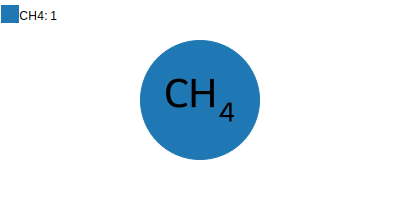

In [11]:
import ugropy as ug

# Obtain the functional groups of the PSRK model
methane_groups = ug.psrk.get_groups("methane")

decane_groups = ug.psrk.get_groups("decane")

# Visualize the functional groups:
methane_groups.draw()

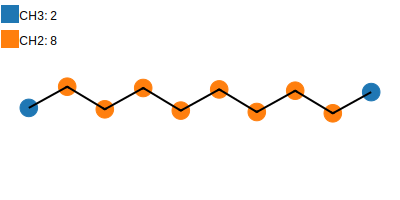

In [12]:
decane_groups.draw()

In [13]:
# Get the functional groups list ready to use in yaeos PSRK!

groups = [methane_groups.subgroups_num, decane_groups.subgroups_num]

print(groups)

[{118: 1}, {1: 2, 2: 8}]
